In [113]:
import time
from IPython import display
from matplotlib import pyplot
from matplotlib import colors
import numpy as np
import random

In [114]:
# 0 1 2
# 3 4 5
# 6 7 8

class Car:
    
    def __init__(self, x_coordinate, y_coordinate, x_destination, y_destination, orientation, size):
        #Initialize all variables
        self.x = x_coordinate
        self.y = y_coordinate
        self.destination = (x_destination, y_destination)
        self.orientation = orientation
        self.directions = [[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]]
        self.size = size
        self.time = 0
        self.arriving = False
        self.last_road = False
        self.intersection = False
        self.look = [0, 0]
        self.stop_time = 0
        self.time_to_destination = 0
        
    def left(self, spots):
        #Return coordinates {spots} units to the left of the car
        if self.orientation == 1:
            return (self.x + (self.directions[3][0] * spots)) % self.size, (self.y + (self.directions[3][1] * spots)) % self.size
        elif self.orientation == 5:
            return (self.x + (self.directions[1][0] * spots)) % self.size, (self.y + (self.directions[1][1] * spots)) % self.size
        elif self.orientation == 7:
            return (self.x + (self.directions[5][0] * spots)) % self.size, (self.y + (self.directions[5][1] * spots)) % self.size
        elif self.orientation == 3:
            return (self.x + (self.directions[7][0] * spots)) % self.size, (self.y + (self.directions[7][1] * spots)) % self.size

    def right(self, spots):
        #Return coordinates {spots} units to the right of the car
        if self.orientation == 1:
            return (self.x + (self.directions[5][0] * spots)) % self.size, (self.y + (self.directions[5][1] * spots)) % self.size
        elif self.orientation == 5:
            return (self.x + (self.directions[7][0] * spots)) % self.size, (self.y + (self.directions[7][1] * spots)) % self.size
        elif self.orientation == 7:
            return (self.x + (self.directions[3][0] * spots)) % self.size, (self.y + (self.directions[3][1] * spots)) % self.size
        elif self.orientation == 3:
            return (self.x + (self.directions[1][0] * spots)) % self.size, (self.y + (self.directions[1][1] * spots)) % self.size


    def forward(self, spots):
        #Return coordinates {spots} units in front of the car
        return (self.x + (self.directions[self.orientation][0] * spots)) % self.size, (self.y + (self.directions[self.orientation][1] * spots)) % self.size

    def stoplight(self):
        #Returns coordinates in front and to the left, where a stoplight would be
        if self.orientation == 1:
            return (self.x + self.directions[0][0]) % self.size, (self.y + self.directions[0][1]) % self.size
        elif self.orientation == 5:
            return (self.x + self.directions[2][0]) % self.size, (self.y + self.directions[2][1]) % self.size
        elif self.orientation == 7:
            return (self.x + self.directions[8][0]) % self.size, (self.y + self.directions[8][1]) % self.size
        elif self.orientation == 3:
            return (self.x + self.directions[6][0]) % self.size, (self.y + self.directions[6][1]) % self.size

    def distance(self, right):
        #Returns the distance along one axis if turning in that direction
        if right:
            #If turning right 
            if self.orientation == 1:
                if self.destination[1] > self.y:
                    return self.destination[1] - self.y
                else:
                    return (self.size - self.y) + self.destination[1]
            elif self.orientation == 5:
                if self.destination[0] > self.x:
                    return self.destination[0] - self.x
                else:
                    return (self.size - self.x) + self.destination[0]
            elif self.orientation == 7:
                if self.y > self.destination[1]:
                    return self.y - self.destination[1]
                else:
                    return (self.size - self.destination[1]) + self.y
            elif self.orientation == 3:
                if self.x > self.destination[0]:
                    return self.x - self.destination[0]
                else:
                    return (self.size - self.destination[0]) + self.x
        else:
            #If turning left
            if self.orientation == 1:
                if self.y > self.destination[1]:
                    return self.y - self.destination[1]
                else:
                    return (self.size - self.destination[1]) + self.y
            elif self.orientation == 5:
                if self.x > self.destination[0]:
                    return self.x - self.destination[0]
                else:
                    return (self.size - self.destination[0]) + self.x
            elif self.orientation == 7:
                if self.destination[1] > self.y:
                    return self.destination[1] - self.y
                else:
                    return (self.size - self.y) + self.destination[1]
            elif self.orientation == 3:
                if self.destination[0] > self.x:
                    return self.destination[0] - self.x
                else:
                    return (self.size - self.x) + self.destination[0]

    def turn(self, right):
        #Changes the cars orientation according to which way it is turning
        if right:
            #If turning right
            if self.orientation == 1:
                self.orientation = 5
            elif self.orientation == 5:
                self.orientation = 7
            elif self.orientation == 7:
                self.orientation = 3
            elif self.orientation == 3:
                self.orientation = 1
        else:
            #If turning left
            if self.orientation == 1:
                self.orientation = 3
            elif self.orientation == 5:
                self.orientation = 1
            elif self.orientation == 7:
                self.orientation = 5
            elif self.orientation == 3:
                self.orientation = 7

    def road_last(self):
        #Sets last_road to true if on the same road as the destination. Also tells car which way to look (left or right) for destination
        if self.orientation == 1:
            if (self.y + 2) % self.size == self.destination[1]:
                self.last_road = True
                self.look = [0, 2]
            elif (self.y - 6) % self.size == self.destination[1]:
                self.last_road = True
                self.look = [0, -6]
        elif self.orientation == 5:
            if (self.x + 2) % self.size == self.destination[0]:
                self.last_road = True
                self.look = [2, 0]
            elif (self.x - 6) % self.size == self.destination[0]:
                self.last_road = True
                self.look = [-6, 0]
        elif self.orientation == 7:
            if (self.y - 2) % self.size == self.destination[1]:
                self.last_road = True
                self.look = [0, -2]
            elif (self.y + 6) % self.size == self.destination[1]:
                self.last_road = True
                self.look = [0, 6]
        elif self.orientation == 3:
            if (self.x - 2) % self.size == self.destination[0]:
                self.last_road = True
                self.look = [-2, 0]
            elif (self.x + 6) % self.size == self.destination[0]:
                self.last_road = True
                self.look = [6, 0]

    def cross(self):
        #Returns true if the road being crossed to reach the destination is clear to cross
        check = []
        if self.orientation == 1:
            for i in range(1, 5):
                check.append([self.x - 2, self.y + i])
        elif self.orientation == 5:
            for i in range(1, 5):
                check.append([self.x + i, self.y + 2])
        elif self.orientation == 7:
            for i in range(1, 5):
                check.append([self.x + 2, self.y - i])
        elif self.orientation == 3:
            for i in range(1, 5):
                check.append([self.x - i, self.y - 2])
        return check

    def manhattan_distance(self):
        #returns to manhattan distance (the distance between two points measured along axes at right angles)
        sum = 0
        if self.x > self.destination[0]:
            sum += self.x - self.destination[0]
        else:
            sum += (self.size - self.destination[0]) + self.x
        if self.y > self.destination[1]:
            sum += self.x - self.destination[1]
        else:
            sum += (self.size - self.destination[1]) + self.y
        return sum
        

In [115]:
class TrafficSimulation:

    def __init__(self, grid_size, num_cars, num_destinations):
        #Initialize all variables
        self.grid_size = grid_size
        self.num_cars = num_cars
        self.num_destinations = num_destinations
        self.arrived = 0
        self.grid = []
        self.cars = []
        self.road_x = []
        self.road_y = []
        self.intersections = {}
        self.destinations = []
        self.stop_times = []
        self.times_to_destination = []
    
    def initialize(self):
        #Initialize the grid

        #Set grid to 0 and set locations for roads
        self.grid = [[0 for _ in range(self.grid_size)] for _ in range(self.grid_size)]
        self.road_x = [25, 50, 75]
        self.road_y = [25, 50, 75]

        #Create road 7 units wide along x axis
        for road in self.road_x:
            for y in range(self.grid_size):
                self.grid[road][y] = 3
                for r in range(1, 4):
                    self.grid[road + r][y] = 2
                    self.grid[road - r][y] = 2

        #Create road 7 units wide along y axis
        for road in self.road_y:
            for x in range(self.grid_size):
                self.grid[x][road] = 3
                for r in range(1, 4):
                    self.grid[x][road + r] = 2
                    self.grid[x][road - r] = 2

        #Create intersections where roads meet, set the stoplights
        for rx in self.road_x:
            for ry in self.road_y:
                self.intersections[(rx, ry)] = {
                    "changing": False,
                    "change time": 0
                }
                self.grid[rx][ry] = 2
                for r in range(1, 4):
                    self.grid[rx + r][ry] = 2
                    self.grid[rx - r][ry] = 2
                self.grid[rx + 1][ry - 3] = 4
                self.grid[rx - 1][ry + 3] = 4
                self.grid[rx + 3][ry + 1] = 6
                self.grid[rx - 3][ry - 1] = 6

        #Set destinations
        for _ in range(self.num_destinations):
            #Probability on x road
            p_x = float(len(self.road_x)) / float(len(self.road_x) + len(self.road_y))
            
            if random.random() < p_x:
                #Destination along x road

                #Randomly assign road and side of the road
                road = np.random.choice(self.road_x)
                side = np.random.choice([road - 4, road + 4])

                #Find available spot on road. Not next to intersection and not on top of or too close to another destination
                available = list(range(self.grid_size))
                for intersect in self.intersections:
                    if road == intersect[0]:
                        available.remove(intersect[1])
                        for r in range(1, 5):
                            available.remove(intersect[1] + r)
                            available.remove(intersect[1] - r)
                for d in range(len(self.destinations)):
                    if side == self.destinations[d][0]:
                        available.remove(self.destinations[d][1])
                        if (self.destinations[d][1] + 1) % self.grid_size in available:
                            available.remove((self.destinations[d][1] + 1) % self.grid_size)
                        if (self.destinations[d][1] - 1) % self.grid_size in available:
                            available.remove((self.destinations[d][1] - 1) % self.grid_size)

                #Randomly assign destination to available spot and add it to the grid
                y = np.random.choice(available)
                self.grid[side][y] = 7
                self.destinations.append((side, y))
            else:
                #Destination along y road

                #Randomly assign road and side of the road
                road = np.random.choice(self.road_y)
                side = np.random.choice([road - 4, road + 4])

                #Find available spot on road. Not next to intersection and not on top of or too close to another destination
                available = list(range(self.grid_size))
                for intersect in self.intersections:
                    if road == intersect[1]:
                        available.remove(intersect[0])
                        for r in range(1, 5):
                            available.remove(intersect[0] + r)
                            available.remove(intersect[0] - r)
                for d in range(len(self.destinations)):
                    if side == self.destinations[d][1]:
                        available.remove(self.destinations[d][0])
                        if (self.destinations[d][0] + 1) % self.grid_size in available:
                            available.remove((self.destinations[d][0] + 1) % self.grid_size)
                        if (self.destinations[d][0] - 1) % self.grid_size in available:
                            available.remove((self.destinations[d][0] - 1) % self.grid_size)

                #Randomly assign destination to available spot and add it to the grid
                x = np.random.choice(available)
                self.grid[x][side] = 7
                self.destinations.append((x, side))

        #Set cars
        for _ in range(self.num_cars):
            #Randomly assign the car's destination
            d_num = np.random.choice(range(self.num_destinations))
            destination = self.destinations[d_num]

            #Probability on x road
            p_x = float(len(self.road_x)) / float(len(self.road_x) + len(self.road_y))

            if random.random() < p_x:
                #Car along x road

                #Randomly assign road and side of the road
                road = np.random.choice(self.road_x)
                side = np.random.choice([road - 2, road + 2])

                #Assign orientation according to the side of the road
                if side == road - 2:
                    orientation = 3
                else:
                    orientation = 5

                #Find available spot on available road. Not on an intersection and not on top of or too close to another car
                available = list(range(self.grid_size))
                for intersect in self.intersections:
                    if road == intersect[0]:
                        available.remove(intersect[1])
                        for r in range(1, 4):
                            available.remove(intersect[1] + r)
                            available.remove(intersect[1] - r)
                for car in self.cars:
                    if side == car.x:
                        available.remove(car.y)
                        if (car.y + 1) % self.grid_size in available:
                            available.remove((car.y + 1) % self.grid_size)
                        if (car.y - 1) % self.grid_size in available:
                            available.remove((car.y - 1) % self.grid_size)

                #Randomly assign car to available spot and add it to the grid
                y = np.random.choice(available)
                self.grid[side][y] = 1
                c = Car(side, y, destination[0], destination[1], orientation, self.grid_size)
                self.cars.append(c)

                #Check if car is on same road as destination
                c.road_last()

                #Check if car is next to destination
                if self.grid[(c.x + c.look[0]) % self.grid_size][(c.y + c.look[1]) % self.grid_size] == 7:
                    c.last_road = False
                    c.arriving = True
                    if 2 in np.abs(np.array(c.look)):
                        c.turn(True)
                    else:
                        c.turn(False)

                #Check if car is at stoplight
                x_l, y_l = c.stoplight()
                if self.grid[x_l][y_l] in [4, 6]:
                    c.intersection = True
            else:
                #Car along x road

                #Randomly assign road and side of the road
                road = np.random.choice(self.road_y)
                side = np.random.choice([road - 2, road + 2])

                #Assign orientation according to the side of the road
                if side == road - 2:
                    orientation = 7
                else:
                    orientation = 1

                #Find available spot on available road. Not on an intersection and not on top of or too close to another car
                available = list(range(self.grid_size))
                for intersect in self.intersections:
                    if road == intersect[1]:
                        available.remove(intersect[0])
                        for r in range(1, 4):
                            available.remove(intersect[0] + r)
                            available.remove(intersect[0] - r)
                for car in self.cars:
                    if side == car.y:
                        available.remove(car.x)
                        if (car.x + 1) % self.grid_size in available:
                            available.remove((car.x + 1) % self.grid_size)
                        if (car.x - 1) % self.grid_size in available:
                            available.remove((car.x - 1) % self.grid_size)

                #Randomly assign car to available spot and add it to the grid
                x = np.random.choice(available)
                self.grid[x][side] = 1
                c = Car(x, side, destination[0], destination[1], orientation, self.grid_size)
                self.cars.append(c)

                #Check if car is on same road as destination
                c.road_last()

                #Check if car is next to destination
                if self.grid[(c.x + c.look[0]) % self.grid_size][(c.y + c.look[1]) % self.grid_size] == 7:
                    c.last_road = False
                    c.arriving = True
                    if 2 in np.abs(np.array(c.look)):
                        c.turn(True)
                    else:
                        c.turn(False)

                #Check if car is at stoplight
                x_l, y_l = c.stoplight()
                if self.grid[x_l][y_l] in [4, 6]:
                    c.intersection = True
            
    def update_lights(self, sync, change_prob):
        #Update the stoplights
        
        if sync:
            #If stoplights are synchronized
            if self.intersections[(self.road_x[0], self.road_y[0])]["changing"]:
                #If stoplight is changing
                if self.intersections[(self.road_x[0], self.road_y[0])]["change time"] == 5:
                    #If stoplight is done changing, change the light to green and red
                    for intersection in self.intersections:
                        self.intersections[intersection]["changing"] = False
                        self.intersections[intersection]["change time"] = 0
                        if self.grid[intersection[0] + 1][intersection[1] - 3] == 5:
                            self.grid[intersection[0] + 1][intersection[1] - 3] = 6
                            self.grid[intersection[0] - 1][intersection[1] + 3] = 6
                            self.grid[intersection[0] + 3][intersection[1] + 1] = 4
                            self.grid[intersection[0] - 3][intersection[1] - 1] = 4
                        else:
                            self.grid[intersection[0] + 1][intersection[1] - 3] = 4
                            self.grid[intersection[0] - 1][intersection[1] + 3] = 4
                            self.grid[intersection[0] + 3][intersection[1] + 1] = 6
                            self.grid[intersection[0] - 3][intersection[1] - 1] = 6
                else:
                    #If light is not done changing, increment the time it has been changing
                    for intersection in self.intersections:
                        self.intersections[intersection]["change time"] += 1
            elif random.random() < change_prob:
                #Change the light to yellow
                for intersection in self.intersections:
                    self.intersections[intersection]["changing"] = True
                    self.intersections[intersection]["change time"] = 1
                    if self.grid[intersection[0] + 1][intersection[1] - 3] == 4:
                        self.grid[intersection[0] + 1][intersection[1] - 3] = 5
                        self.grid[intersection[0] - 1][intersection[1] + 3] = 5
                    else:
                        self.grid[intersection[0] + 3][intersection[1] + 1] = 5
                        self.grid[intersection[0] - 3][intersection[1] - 1] = 5
        else:
            #If stoplights are not synchronized
            for intersection in self.intersections:
                if self.intersections[intersection]["changing"]:
                    #If stoplight is changing
                    if self.intersections[intersection]["change time"] == 5:
                        #If stoplight is done changing, change the light to green and red
                        self.intersections[intersection]["changing"] = False
                        self.intersections[intersection]["change time"] = 0
                        if self.grid[intersection[0] + 1][intersection[1] - 3] == 5:
                            self.grid[intersection[0] + 1][intersection[1] - 3] = 6
                            self.grid[intersection[0] - 1][intersection[1] + 3] = 6
                            self.grid[intersection[0] + 3][intersection[1] + 1] = 4
                            self.grid[intersection[0] - 3][intersection[1] - 1] = 4
                        else:
                            self.grid[intersection[0] + 1][intersection[1] - 3] = 4
                            self.grid[intersection[0] - 1][intersection[1] + 3] = 4
                            self.grid[intersection[0] + 3][intersection[1] + 1] = 6
                            self.grid[intersection[0] - 3][intersection[1] - 1] = 6
                    else:
                        #If light is not done changing, increment the time it has been changing
                        self.intersections[intersection]["change time"] += 1
                elif random.random() < change_prob:
                    #Change the light to yellow
                    self.intersections[intersection]["changing"] = True
                    self.intersections[intersection]["change time"] = 1
                    if self.grid[intersection[0] + 1][intersection[1] - 3] == 4:
                        self.grid[intersection[0] + 1][intersection[1] - 3] = 5
                        self.grid[intersection[0] - 1][intersection[1] + 3] = 5
                    else:
                        self.grid[intersection[0] + 3][intersection[1] + 1] = 5
                        self.grid[intersection[0] - 3][intersection[1] - 1] = 5

    def update_cars(self):
        #Update the cars

        #Update the cars in a random order
        random.shuffle(self.cars)
        for car in self.cars:
            #Increment the time it took car to get to destination
            car.time_to_destination += 1

            #Look ahead 1 and 2 spots
            x1, y1 = car.forward(1)
            x2, y2 = car.forward(2)

            if car.arriving:
                #If care is arriving at destination
                
                if car.time == 0:
                    if self.grid[x1][y1] == 2 and self.grid[x2][y2] in [3, 7]:
                        #If spots in front of car are clear, move forward
                        car.time += 1
                        self.grid[car.x][car.y] = 2
                        self.grid[x1][y1] = 1
                        car.x = x1
                        car.y = y1
                    else:
                        #If spots in front of car are not clear, increment time stopped
                        car.stop_time += 1
                elif car.time == 1:
                    if self.grid[x1][y1] == 7:
                        #If arriving at destination, increment arrived and remove car from grid
                        self.grid[car.x][car.y] = 2
                        self.arrived += 1
                        self.stop_times.append(car.stop_time)
                        self.times_to_destination.append(car.time_to_destination)
                        self.cars.remove(car)
                    elif self.grid[x1][y1] == 3 and self.grid[x2][y2] == 2:
                        #If spots in front of car are clear, move forward
                        self.grid[car.x][car.y] = 2
                        self.grid[x1][y1] = 1
                        car.x = x1
                        car.y = y1
                        car.time += 1
                    else:
                        #If spots in front of car are not clear, increment time stopped
                        car.stop_time += 1 
                elif car.time == 2:
                    #If crossing lane, check it is clear
                    clear = True
                    check = car.cross()
                    for coords in check:
                        if self.grid[coords[0] % self.grid_size][coords[1] % self.grid_size] == 1:
                            clear = False

                    if self.grid[x1][y1] == 2 and self.grid[x2][y2] == 2 and clear:
                        #If no cars in front and lane clear, move forward
                        self.grid[car.x][car.y] = 3
                        self.grid[x1][y1] = 1
                        car.x = x1
                        car.y = y1
                        car.time += 1
                    else:
                        #If spots in front of car are not clear, increment time stopped
                        car.stop_time += 1
                elif car.time == 3:
                    if self.grid[x1][y1] == 2 and self.grid[x2][y2] == 2:
                        #If spots in front of car are clear, move forward
                        self.grid[car.x][car.y] = 2
                        self.grid[x1][y1] = 1
                        car.x = x1
                        car.y = y1
                        car.time = 0
                    else:
                        #If spots in front of car are not clear, increment time stopped
                        car.stop_time += 1
            elif car.last_road:
                #Check for stoplight
                x_l, y_l = car.stoplight()
                
                if self.grid[x1][y1] == 2 and self.grid[x2][y2] == 2 and self.grid[x_l][y_l] in [2, 4]:
                    #If spots in front of car are clear and no stoplight, move forward
                    self.grid[car.x][car.y] = 2
                    self.grid[x1][y1] = 1
                    car.x = x1
                    car.y = y1
                else:
                    #If spots in front of car are not clear, increment time stopped
                    car.stop_time += 1

                #If car next to destination, enter arriving phase and turn toward destination
                if self.grid[(car.x + car.look[0]) % self.grid_size][(car.y + car.look[1]) % self.grid_size] == 7:
                    car.last_road = False
                    car.arriving = True
                    if 2 in np.abs(np.array(car.look)):
                        car.turn(True)
                    else:
                        car.turn(False)
            elif car.intersection:
                #If car at intersection
                
                if car.time == 0:
                    #Check color of stoplight
                    x_l, y_l = car.stoplight()

                    
                    if self.grid[x_l][y_l] == 4 and self.grid[x1][y1] == 2 and self.grid[x2][y2] == 2:
                        #If light is green and no cars in front, move forward
                        self.grid[car.x][car.y] = 2
                        self.grid[x1][y1] = 1
                        car.x = x1
                        car.y = y1
                        car.time = 1
                    else:
                        #If light red or yellow or cars in front, increment time stopped
                        car.stop_time += 1
                elif car.time in [1, 3, 4, 5]:
                    if self.grid[x1][y1] == 2 and self.grid[x2][y2] == 2:
                        #If spots in front of car are clear, move forward
                        self.grid[car.x][car.y] = 2
                        self.grid[x1][y1] = 1
                        car.x = x1
                        car.y = y1
                        car.time += 1
                    else:
                        #If spots in front of car are not clear, increment time stopped
                        car.stop_time += 1
                elif car.distance(True) <= car.distance(False):
                    #If right turn is shorter distance to destination

                    #Check to right of car
                    xr1, yr1 = car.right(1)
                    xr2, yr2 = car.right(2)

                    
                    if car.time == 2:
                        if self.grid[xr1][yr1] == 2 and self.grid[xr2][yr2] == 2:
                            #If spots in front of car are clear, turn car right and move forward
                            self.grid[car.x][car.y] = 2
                            self.grid[xr1][yr1] = 1
                            car.x = xr1
                            car.y = yr1
                            car.turn(True) 
                            car.time = 0
                            car.intersection= False

                            #Check if destination is on road
                            car.road_last()
                        else:
                            #If spots in front of car are not clear, increment time stopped
                            car.stop_time += 1
                else:
                    #If left turn is shorter distance to destination

                    #Check to left of car
                    xl1, yl1 = car.left(1)
                    xl2, yl2 = car.left(2)

                    if car.time == 2:
                        if self.grid[x1][y1] == 2 and self.grid[x2][y2] == 2:
                            #If in right lane, right forward
                            self.grid[car.x][car.y] = 2
                            self.grid[x1][y1] = 1
                            car.x = x1
                            car.y = y1
                            car.time += 1
                        else:
                            #If spots in front of car are not clear, increment time stopped
                            car.stop_time += 1
                    elif car.time == 6:
                        if self.grid[xl1][yl1] == 2 and self.grid[xl2][yl2] == 2:
                            #If in left lane and spots in front of car are clear, turn left and move forward
                            self.grid[car.x][car.y] = 2
                            self.grid[xl1][yl1] = 1
                            car.x = xl1
                            car.y = yl1
                            car.turn(False) 
                            car.time = 0
                            car.intersection = False

                            #Check if destination is on road
                            car.road_last()
                        else:
                            #If spots in front of car are not clear, increment time stopped
                            car.stop_time += 1
            else:
                if self.grid[x1][y1] == 2 and self.grid[x2][y2] == 2:
                    #If spots in front of car are clear, move forward
                    self.grid[car.x][car.y] = 2
                    self.grid[x1][y1] = 1
                    car.x = x1
                    car.y = y1

                    #Check for stoplight
                    x_l, y_l = car.stoplight()
                    if self.grid[x_l][y_l] in [4, 5, 6]:
                        car.intersection = True
                else:
                    #If spots in front of car are not clear, increment time stopped
                    car.stop_time += 1


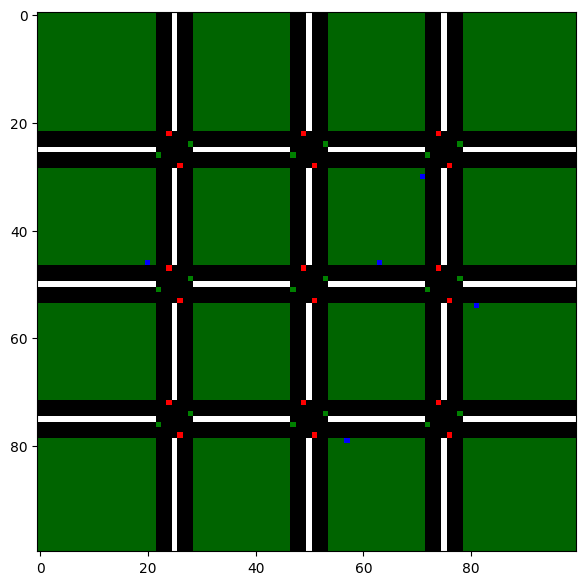

100.0% of Cars Arrived at their Destination
Average Stop Time: 35.51
Average Time to Destination: 111.69


In [117]:
#Set variables
grid_size = 100
num_cars = 100
num_destinations = 5
sync = True
change_prob = 0.1

#Initialize simulation
sim = TrafficSimulation(grid_size, num_cars, num_destinations)
sim.initialize()

#Set colors
#0 is grass
#1 is car
#2 is road
#3 is middle of road
#4 is green light
#5 is yellow light
#6 is red light
#7 is destination
colormap = colors.ListedColormap(["darkgreen", "grey", "black", "white", "green", "yellow", "red", "blue"])

#Show initial grid
pyplot.figure(figsize = (7, 7))
pyplot.imshow(sim.grid, cmap = colormap)
display.clear_output(wait=True)
pyplot.show()
time.sleep(0.5)

#Run simulation for all time steps or until all cars have reached their destination
timesteps = 300
t = 0
while t < timesteps and sim.cars:
    #Increment timestep
    t += 1

    #Update lights and cars
    sim.update_lights(sync, change_prob)
    sim.update_cars()

    #Show grid
    pyplot.figure(figsize = (7, 7))
    pyplot.imshow(sim.grid, cmap = colormap)
    display.clear_output(wait=True)
    pyplot.show()
    time.sleep(0.1)

#Close plot
pyplot.close()

#Append stop times and time to destinations of cars that did not reach their destination
for car in sim.cars:
    sim.stop_times.append(car.stop_time)
    sim.times_to_destination.append(timesteps + car.manhattan_distance())

#Print result metrics
print(f"{100 * sim.arrived / num_cars}% of Cars Arrived at their Destination")
print("Average Stop Time:", sum(sim.stop_times) / num_cars)
print("Average Time to Destination:", sum(sim.times_to_destination) / num_cars)

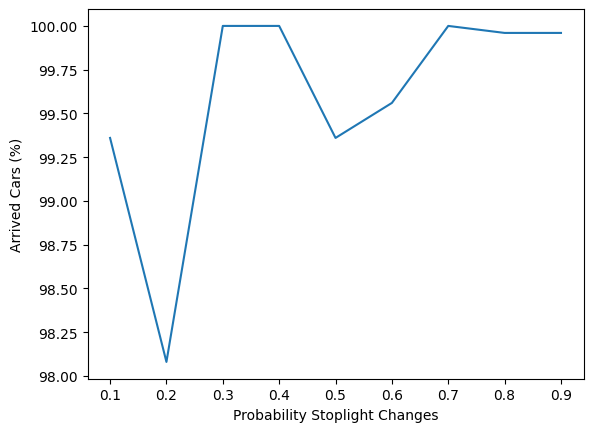

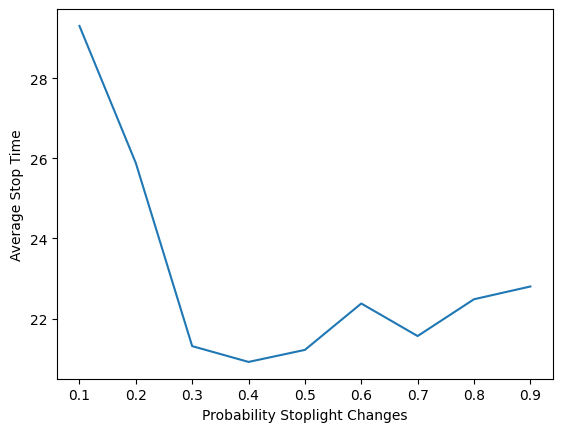

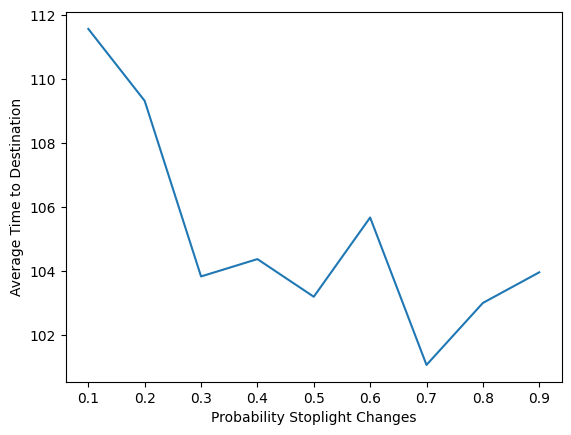

'\nprint("Synchronized")\nprint(f"{arrived_perc[0]}% of Cars Arrived at their Destination")\nprint("Average Stop Time:", stop_time[0])\nprint("Average Time to Destination:", time_to_dest[0])\nprint("Not Synchronized")\nprint(f"{arrived_perc[1]}% of Cars Arrived at their Destination")\nprint("Average Stop Time:", stop_time[1])\nprint("Average Time to Destination:", time_to_dest[1])\n'

In [118]:
#Set variables being tested
variables = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

#Initialize metrics
arrived_perc = []
time_to_dest = []
stop_time = []

#Set number of runs
runs = 50

#For all varibles
for var in variables:
    #Set sums to 0
    sum_arrived_perc = 0
    sum_time_to_dest = 0
    sum_stop_time = 0
    
    for _ in range(runs):
        #Test variable {runs} times

        #Set variables
        num_cars = 50
        num_destinations = 10
        sync = True
        change_prob = var

        #Initialize simulation
        grid_size = 100
        sim = TrafficSimulation(grid_size, num_cars, num_destinations)
        sim.initialize()

        #Run simulation for all time steps or until all cars have reached their destination
        timesteps = 300
        t = 0
        while t < timesteps and sim.cars:
            #Increment timestep
            t += 1

            #Update lights and cars
            sim.update_lights(sync, change_prob)
            sim.update_cars()

        #Append stop times and time to destinations of cars that did not reach their destination
        for car in sim.cars:
            sim.stop_times.append(car.stop_time)
            sim.times_to_destination.append(timesteps + car.manhattan_distance())

        #Add metrics to metric sums
        sum_arrived_perc += 100 * sim.arrived / num_cars
        sum_time_to_dest += sum(sim.stop_times) / num_cars
        sum_stop_time += sum(sim.times_to_destination) / num_cars

    #Average metric sums over number of runs and append to list
    arrived_perc.append(sum_arrived_perc / runs)
    time_to_dest.append(sum_time_to_dest / runs)
    stop_time.append(sum_stop_time / runs)

#Print results
x_label = "Probability Stoplight Changes"
pyplot.plot(variables, arrived_perc)
pyplot.xlabel(x_label)
pyplot.ylabel("Arrived Cars (%)")
pyplot.show()
pyplot.plot(variables, time_to_dest)
pyplot.xlabel(x_label)
pyplot.ylabel("Average Stop Time")
pyplot.show()
pyplot.plot(variables, stop_time)
pyplot.xlabel(x_label)
pyplot.ylabel("Average Time to Destination")
pyplot.show()
'''
print("Synchronized")
print(f"{arrived_perc[0]}% of Cars Arrived at their Destination")
print("Average Stop Time:", stop_time[0])
print("Average Time to Destination:", time_to_dest[0])
print("Not Synchronized")
print(f"{arrived_perc[1]}% of Cars Arrived at their Destination")
print("Average Stop Time:", stop_time[1])
print("Average Time to Destination:", time_to_dest[1])
'''